In [1]:
import numpy as np

In [51]:
%%bash
./mk3cap -t 30 data/data.raw


./cma24b_to_intel32b ./data/data.raw ./data/DSP_combined_2.32b
rm ./data/data.raw

./mk3cap (200 frames / 22050 Hz) started: Thu Oct  3 07:47:49 2019
Starting RAW file capture on Mk3 id:768 / Prom #CMA3v920
 - dropping the first 0 sample(s)
 - withOUT normalization of data
 - NOT fixing the 1 sample delay
Wrote 30 seconds, exiting
./mk3cap ended: Thu Oct  3 07:48:19 2019


In [27]:
import numpy as np
import os
import sounddevice as sd

import matplotlib
%matplotlib inline
matplotlib.use('Agg')
import matplotlib.pyplot as plt

t0 = 5
fs = 22050 # sampling rate
M = 64 # Channels
K = t0*fs # num samples per channel

### File handling and I/O ###
raw = np.fromfile('/home/pi/record/data/target_only_10dbdown.32b', dtype=np.int32) # read input file
x__ = np.empty([M,K], dtype=np.float32)
for i in range(M):
    x__[i,:] = raw[i:M*K:M]


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1314: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [28]:
x__.shape

(64, 110250)

In [29]:
elpow_ = 10*np.log10(np.var(x__,axis=1))

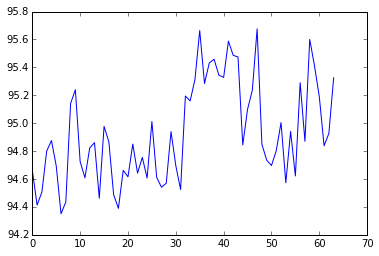

In [30]:
plt.plot(elpow_)

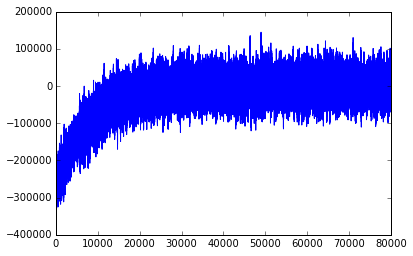

In [31]:
plt.plot(x__[8,:80000])
#plt.plot(x__[44,4000:5000])

In [32]:
import sounddevice as sd
el_idx = 10
sd.play(.99 * x__[el_idx,:] / np.max(x__[el_idx,:]),fs)